In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
%matplotlib inline


In [709]:
def plot_images(images, grey):
    fig = plt.figure(figsize=(15,18))
    for i in range(min(16, len(images))):
        fig.add_subplot(4, 4, i+1)
        if grey:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i]) 
    plt.show() 

In [172]:
def drop_index(index):
    index_x = []
    index_result = []
    for i in range(1, len(index)):
        if (index[i] - index[i-1]) == 1:
            index_x.append(index[i-1])
        else:            
            index_x.append(index[i-1])
            index_m = int(np.mean(index_x))
            index_result.append(index_m)
            index_x = []
    return index_result
        

In [602]:
def char_crop(img, mean_size=3, median_k_a=1.1, mdedian_k_b=1.2, pix_shift_back=2, pix_shoft_forw=4, char_size_min=5.5):
    mean_imgs = []
    imgs = []
    for i in range(0, img.shape[1]):
        mean_imgs.append(np.mean(img[:, i:i + mean_size]))
        i += mean_size
    med_all_img = np.median(mean_imgs)*median_k_a
    index = np.where(mean_imgs >= med_all_img)
    mean_imgs = np.array(mean_imgs)
    mean_imgs[index] = np.max(mean_imgs)
    index = np.where(mean_imgs >= np.max(mean_imgs))
    plt.plot([0, img.shape[1]], [med_all_img, med_all_img])
    plt.plot(mean_imgs)
    if len(index) > 0:
        index = index[0]
    if index[0] > (2*mean_size):
        index = np.insert(index, 0, mean_size)
    for i in range(1, len(index)):
        if (index[i] - index[i-1]) < char_size_min:
            continue
        li = index[i-1]-pix_shift_back if index[i-1]-pix_shift_back >= 0 else index[i-1]
        ri = index[i]+pix_shoft_forw if index[i]+pix_shoft_forw <= img.shape[1] else img.shape[1]
        print(index[i-1], li, index[i], ri)
        imgs.append(np.copy(img[0:img.shape[0], li:ri]))
    plot_images(imgs, True)
    return imgs

In [520]:
def lp_crop(img, mean_size=2, median_k_=0.8, char_size_min=5, max_crop= 5):
    mean_imgs = []
    for i in range(0, img.shape[0]):
        mean_imgs.append(np.mean(img[i:i + mean_size, :]))
        i += mean_size
    med_all_img = np.mean(mean_imgs)*0.8
    print(type(med_all_img))
    index = np.where(mean_imgs <  med_all_img)
    hh = img.shape[0]*0.5
    index = np.squeeze(index, -1)
    sl =index[index >= hh]
    if len(sl) > 0:
        l_top = np.min(sl)
        l_top = l_top if img.shape[0] - l_top <= max_crop else img.shape[0] - max_crop
        print(l_top, img.shape[0])
        img[l_top: img.shape[0], :] = 255
    sl =index[index <= hh]
    if len(sl) > 0:
        l_bot = np.max(sl)
        l_bot = l_bot if l_bot <= max_crop else max_crop
        print(l_bot)
        img[0:l_bot, :] = 255  
    return img
    
    

In [703]:
def img_crop(img, mean_size=2, median_k_=0.8, level_blank = 245, char_bot_off=3, char_top_off=3):
    mean_imgs = []
    for i in range(0, img.shape[0]):
        mean_imgs.append(np.mean(img[i:i + mean_size, :]))
        i += mean_size
    index = np.where(mean_imgs >= np.int32(level_blank))
    print(index)
    hh = img.shape[0]*0.5
    index = np.squeeze(index, -1)
    sl =index[index >= hh]
    l_top = np.min(sl) if len(sl) > 0 else img.shape[0] - 1
    sl =index[index <= hh]
    l_bot = np.max(sl) if len(sl) > 0 else 1 
    w = img.shape[1]
    h = l_top - l_bot
    print(h, w)
    imc = np.zeros((h, w))
    print(imc.shape)
    print(img.shape)
    imc[:,:] = img[l_bot:l_top, :]
    plt.plot([0, img.shape[0]], [med_all_img, med_all_img])
    plt.plot(mean_imgs)
    return np.uint8(imc)

(array([ 0,  1,  2,  3,  4,  5, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),)
31 12
(31, 12)
(64, 12)


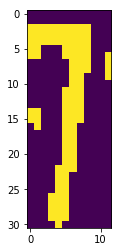

In [683]:
img = img_crop(imgs[8])
if img is not None:
    plt.imshow(img)    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),)


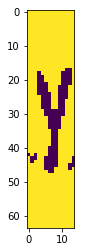

In [652]:
img = img_crop(imgs[5])
if img is not None:
    plt.imshow(img)

(64, 128)
<class 'numpy.float64'>
59 64
1
2 0 13 17
20 18 26 30
27 25 40 44
42 40 53 57
57 55 63 67
69 67 77 81
79 77 85 89
88 86 94 98
98 96 104 108
105 103 120 124


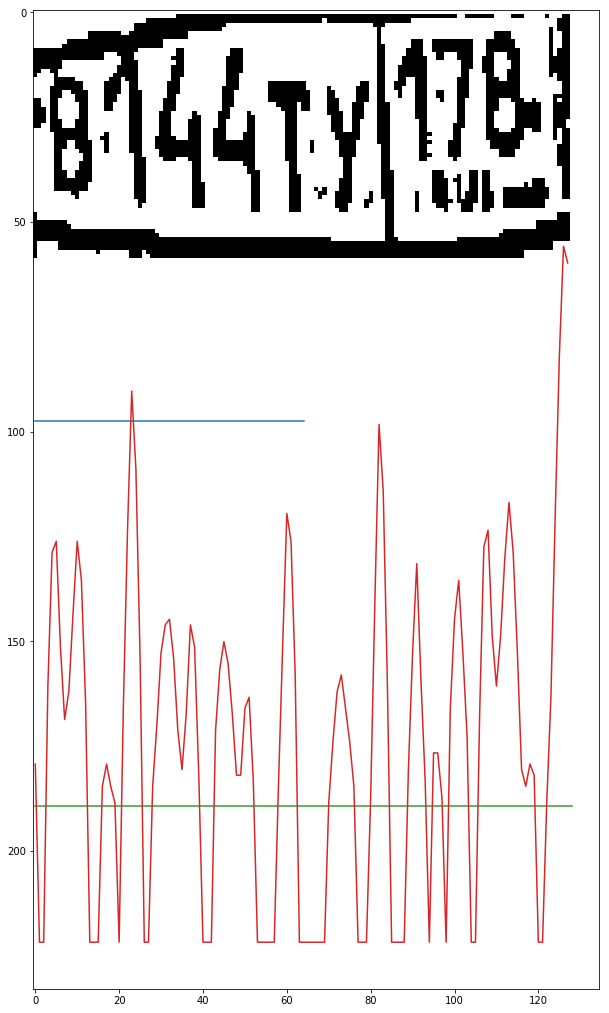

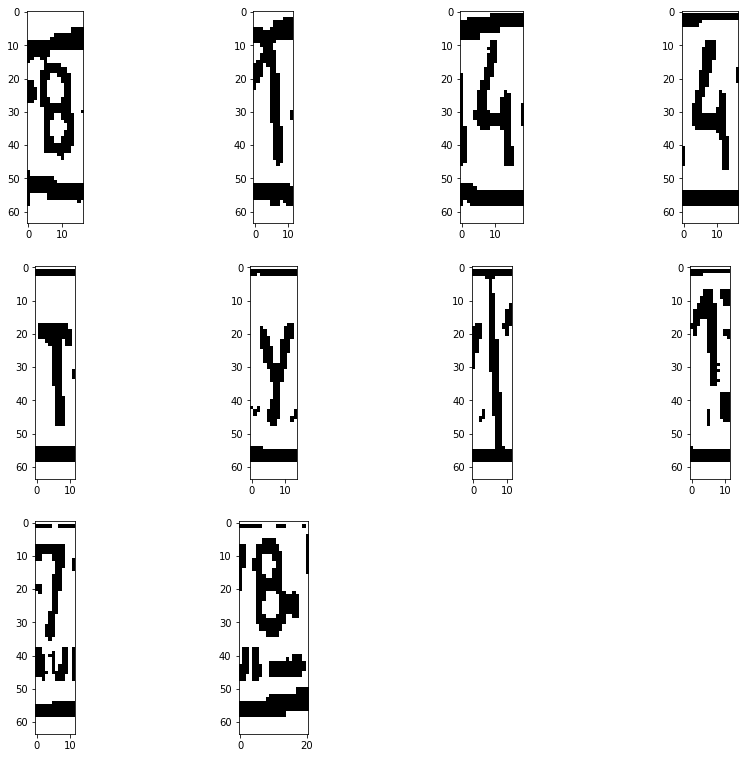

In [704]:
img=cv2.imread('/home/administrator/1/17_1499_B144TY178.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
MEAN_SIZE = 2
fig = plt.figure(figsize=(15,18))
#img = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 3)
kernel = np.ones((1,1),np.uint8)
img = cv2.erode(img, kernel, iterations = 1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 1))
ret, img = cv2.threshold(img, 100, 255, 0)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.plot([0, img.shape[0]], [med_all_img, med_all_img])
plt.plot(mean_imgs)
img = lp_crop(img)
imgplot = plt.imshow(img, cmap='gray')
imgs = char_crop(img)

3 0 10 13
11 8 24 27


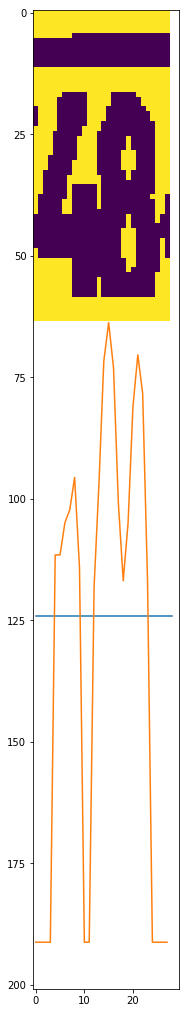

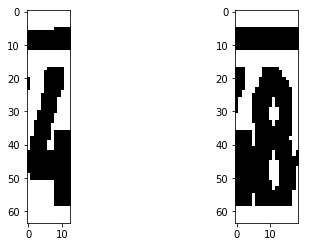

2 2 16 19


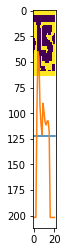

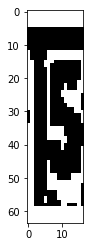

In [575]:
img_wb = []
plt.figure(figsize=(15,18))
for i in range(0, len(imgs)):    
    if imgs[i].shape[1] > 19:
        img_wb.append(i)
off_corr = 0
for i in img_wb:
    plt.imshow(imgs[i + off_corr])
    imgs_split = char_crop(imgs[i+off_corr], pix_shift_back=3, pix_shoft_forw=3)
    if len(imgs_split) > 0:
        imgs[i + off_corr] = imgs_split[0]
        inx = i + 1 + off_corr
        for y in range(1, len(imgs_split)):
            imgs.insert(inx, imgs_split[y])
            inx +=1
    off_corr += len(imgs_split) - 1 

(array([ 2, 35, 36, 48, 59, 60, 61, 62, 63]),)


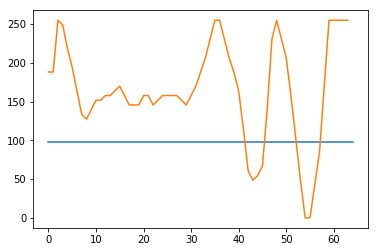

In [645]:
img_crop(imgs[9], mean_size=2, level_blank = 250)

(array([59, 60, 61, 62, 63]),)


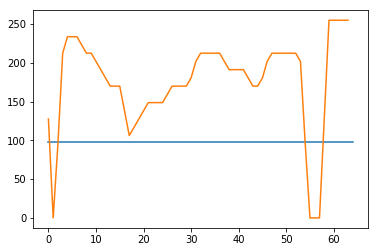

In [636]:
img_crop(imgs[6], mean_size=2, level_blank = 250)

(array([ 0,  1,  2,  3, 44, 45, 46, 47, 58, 59, 60, 61, 62, 63]),)
41 17
(41, 17)
(64, 17)
(array([ 0, 47, 48, 49, 50, 59, 60, 61, 62, 63]),)
47 12
(47, 12)
(64, 12)
(array([47, 48, 49, 50, 59, 60, 61, 62, 63]),)
46 19
(46, 19)
(64, 19)
(array([ 5,  6,  7, 48, 49, 50, 51, 52, 59, 60, 61, 62, 63]),)
41 17
(41, 17)
(64, 17)
(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 48, 49, 50, 51,
       52, 59, 60, 61, 62, 63]),)
33 12
(33, 12)
(64, 12)
(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 48, 49, 50, 51,
       52, 59, 60, 61, 62, 63]),)
33 14
(33, 14)
(64, 14)
(array([59, 60, 61, 62, 63]),)
58 12
(58, 12)
(64, 12)
(array([ 3,  4,  5, 36, 48, 49, 50, 51, 52, 59, 60, 61, 62, 63]),)
31 12
(31, 12)
(64, 12)
(array([ 2,  3,  4,  5, 36, 48, 49, 50, 51, 52, 59, 60, 61, 62, 63]),)
31 12
(31, 12)
(64, 12)
(array([ 2,  3, 35, 36, 48, 59, 60, 61, 62, 63]),)
32 21
(32, 21)
(64, 21)


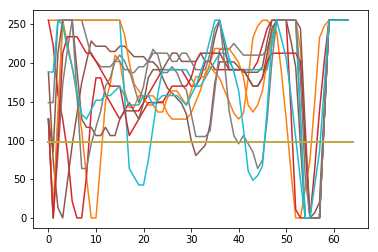

In [705]:
for i in range(0, len(imgs)):
    imgs[i] = img_crop(imgs[i])

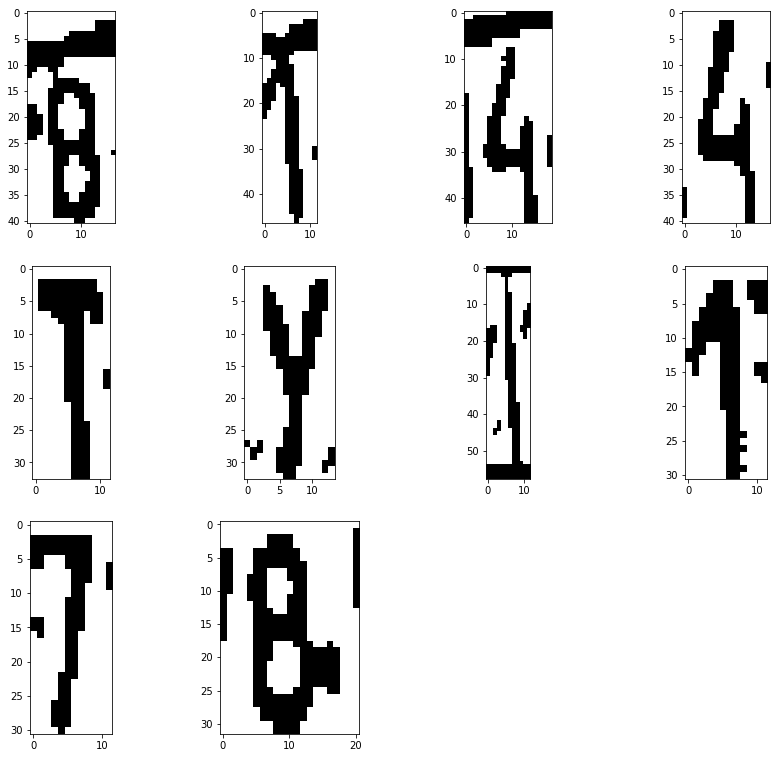

In [712]:
plot_images(imgs, True)

1.55 20.0
2.0 20.0
2.0 24.5
2.0 24.5
2.0 84.0
3.625 84.0
1 Append 84.0
3.625 108.5
3.1 108.5
2 Append 108.5
3.1 54.5
0.3125 54.5
0.3125 117.0
5.0 117.0
3 Append 117.0
5.0 6.5
2.5 6.5
2.5 108.5
7.4 108.5
7.4 32.0
0.45454545454545453 32.0
0.45454545454545453 453.0
2.2777777777777777 453.0
4 Append 453.0
2.2777777777777777 1.5
0.125 1.5
0.125 421.5
2.5 421.5
5 Append 421.5
2.5 183.0
2.909090909090909 183.0
6 Append 183.0
2.909090909090909 7.0
1.3333333333333333 7.0
1.3333333333333333 241.5
2.4615384615384617 241.5
7 Append 241.5
2.4615384615384617 9.0
1.6666666666666667 9.0
1.6666666666666667 138.5
10.2 138.5
10.2 207.0
8.5 207.0
8.5 75.0
3.8 75.0
3.8 94.0
2.727272727272727 94.0
8 Append 94.0
2.727272727272727 81.5
5.0 81.5
9 Append 81.5
5.0 109.5
2.727272727272727 109.5
10 Append 109.5
2.727272727272727 24.0
1.75 24.0
1.75 13.5
2.0 13.5
2.0 292.0
1.55 292.0
11 Append 292.0


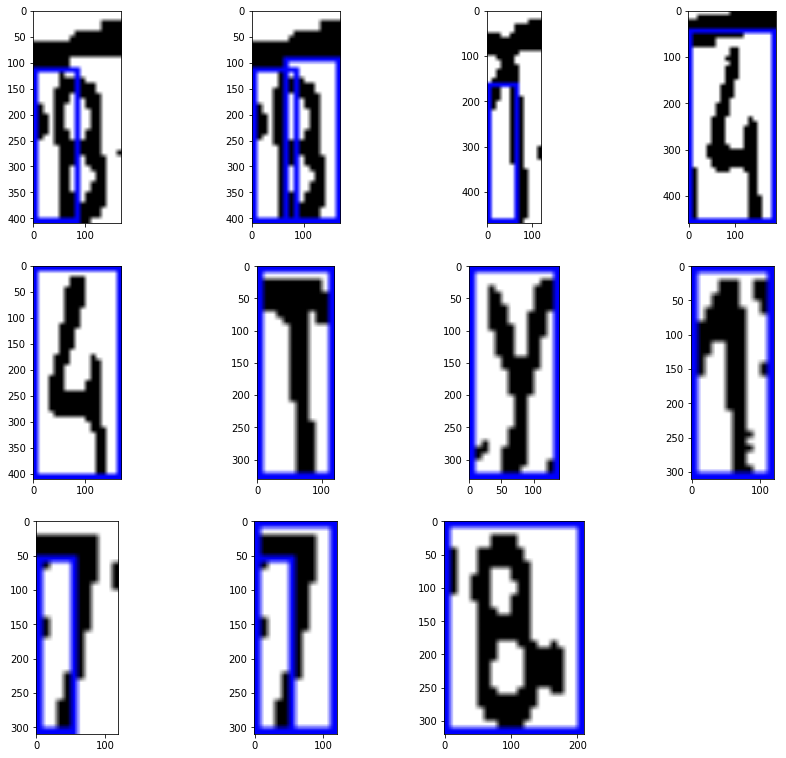

In [711]:
imgs_n = []
i = 1
for img in imgs:
    im2, contours, hierarchy = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for cnt in contours:
        cnt = np.reshape(cnt, (cnt.shape[0], 2))
        min_x, min_y = np.min(cnt, axis=0)
        max_x, max_y = np.max(cnt, axis=0)
        print(koeff, cv2.contourArea(cnt))
        if (max_x - min_x) > 0:            
            koeff = math.fabs((max_y - min_y) / (max_x - min_x))
            print(koeff, cv2.contourArea(cnt))
            if 0.6 < koeff < 6.1 and 80 < cv2.contourArea(cnt):
                print(i, 'Append', cv2.contourArea(cnt))
                i += 1
                cv2.rectangle(img, (min_x, min_y), (max_x, max_y), (0, 0, 255), 1)
                imgs_n.append(cv2.resize(img, (img.shape[1] * 10, img.shape[0] * 10)))
plot_images(imgs_n, False)